## 8.基于主成分分析(PCA)与因子分析(FA)的成绩数据降维任务

In [1]:
import pandas as pd
import numpy as np
mydata = pd.read_csv('data/DataForClassify.csv',encoding="gb2312",usecols = ['yuwen','lishi','zhengzhi','shuxue','wuli','huaxue','ClassifyResult'])
mydata.columns = ['类别', '语文', '历史', '政治', '数学', '物理', '化学']
mydata

,类别,语文,历史,政治,数学,物理,化学
0,1,84,86,75,67,74,51
1,2,79,79,70,77,81,81
2,3,79,60,69,83,81,80
3,2,77,71,79,90,72,80
4,2,88,71,84,78,79,75
...,...,...,...,...,...,...,...
95,3,59,71,52,93,86,77
96,2,84,84,74,79,83,73
97,2,88,75,71,77,78,74
98,1,95,80,85,66,52,67


In [2]:
mydata1 = mydata.copy()
mydata1.columns = ['ClassifyResult', '善良仁义', '诚恳真挚', '担当奉献', '执行力', '影响力', '领导力']
mydata1

,ClassifyResult,善良仁义,诚恳真挚,担当奉献,执行力,影响力,领导力
0,1,84,86,75,67,74,51
1,2,79,79,70,77,81,81
2,3,79,60,69,83,81,80
3,2,77,71,79,90,72,80
4,2,88,71,84,78,79,75
...,...,...,...,...,...,...,...
95,3,59,71,52,93,86,77
96,2,84,84,74,79,83,73
97,2,88,75,71,77,78,74
98,1,95,80,85,66,52,67


In [3]:
train_x=mydata.iloc[:,1:7].values
train_y=mydata.iloc[:,0].values
train_x[0:5]

array([[84, 86, 75, 67, 74, 51],
       [79, 79, 70, 77, 81, 81],
       [79, 60, 69, 83, 81, 80],
       [77, 71, 79, 90, 72, 80],
       [88, 71, 84, 78, 79, 75]], dtype=int64)

In [12]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties 
import math
features = ['语文', '历史', '政治', '数学', '物理', '化学']
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
plt.figure(figsize=(10, 30), dpi = 600)
for i in range(6):
    plt.subplot(6, 1, i+1)
    for label_each in (1, 2, 3):
        plt.hist(train_x[train_y==label_each, i],
                     label=label_each,
                     bins=10,
                     histtype='bar',
                     alpha=0.3)
    plt.xlabel(features[i], FontProperties = font_set)
    plt.ylabel('人数', FontProperties = font_set)
    plt.legend()
plt.show()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


In [5]:
from sklearn.preprocessing import StandardScaler
train_x_std = StandardScaler().fit_transform(train_x)
print(train_x_std[:5])

[[ 0.31517316  1.09724265  0.01308844 -1.09306172  0.10251412 -2.14104074]
 [-0.16236193  0.33752964 -0.49031321 -0.12831175  0.77949418  0.6516211 ]
 [-0.16236193 -1.72454854 -0.59099354  0.45053824  0.77949418  0.55853237]
 [-0.35337597 -0.53071381  0.41580976  1.12586322 -0.09090875  0.55853237]
 [ 0.69720124 -0.53071381  0.91921142 -0.03183675  0.58607131  0.09308873]]


In [6]:
train_x_std_cov=np.cov(train_x_std, rowvar=0)
train_x_std_cov

array([[ 1.01010101,  0.70481701,  0.74779867, -0.5350751 , -0.54876725,
        -0.58220136],
       [ 0.70481701,  1.01010101,  0.64232061, -0.55571454, -0.57703927,
        -0.59699307],
       [ 0.74779867,  0.64232061,  1.01010101, -0.59757461, -0.58694861,
        -0.60445982],
       [-0.5350751 , -0.55571454, -0.59757461,  1.01010101,  0.60995049,
         0.68707157],
       [-0.54876725, -0.57703927, -0.58694861,  0.60995049,  1.01010101,
         0.6365577 ],
       [-0.58220136, -0.59699307, -0.60445982,  0.68707157,  0.6365577 ,
         1.01010101]])

In [7]:
import numpy.linalg as nlg
eig_value,eig_vector=nlg.eig(train_x_std_cov)
print('特征向量：\n',eig_vector)
print('特征值：\n', eig_value)

特征向量：
 [[ 0.41410999  0.52131991 -0.72195552  0.12458816  0.11819232 -0.07763411]
 [ 0.40912246  0.33994542  0.29499983 -0.26551693 -0.72159821  0.19704771]
 [ 0.42028435  0.32411333  0.59297423  0.01888857  0.57409081 -0.19171892]
 [-0.39837248  0.48403406  0.16760437  0.58427225 -0.01124748  0.48725621]
 [-0.39542242  0.35520391  0.08403547  0.07117456 -0.26620181 -0.7965426 ]
 [-0.41162273  0.38360714 -0.07059529 -0.75311479  0.25447285  0.21561603]]
特征值：
 [4.08282553 0.63550453 0.23907002 0.31790566 0.37263397 0.41266636]


In [8]:
eig_pairs = [(np.abs(eig_value[i]), eig_vector[:,i]) for i in range(len(eig_value))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
print('按特征值降序排列')
print(eig_pairs)

按特征值降序排列
[(4.082825527861875, array([ 0.41410999,  0.40912246,  0.42028435, -0.39837248, -0.39542242,
       -0.41162273])), (0.635504528400931, array([0.52131991, 0.33994542, 0.32411333, 0.48403406, 0.35520391,
       0.38360714])), (0.41266635567261767, array([-0.07763411,  0.19704771, -0.19171892,  0.48725621, -0.7965426 ,
        0.21561603])), (0.37263397129333986, array([ 0.11819232, -0.72159821,  0.57409081, -0.01124748, -0.26620181,
        0.25447285])), (0.31790565725699044, array([ 0.12458816, -0.26551693,  0.01888857,  0.58427225,  0.07117456,
       -0.75311479])), (0.23907002012030695, array([-0.72195552,  0.29499983,  0.59297423,  0.16760437,  0.08403547,
       -0.07059529]))]


In [9]:
tot = sum(eig_value)
var_exp = [(i / tot)*100 for i in sorted(eig_value, reverse=True)]
print('每个主成分的贡献率为：\n', var_exp)

每个主成分的贡献率为：
 [67.36662120972093, 10.48582471861536, 6.808994868598192, 6.1484605263401075, 5.245443344740342, 3.944655331985065]


In [10]:
cum_var_exp = np.cumsum(var_exp)
for i in range(len(cum_var_exp)):
    print('第{}个主成分的累积贡献率是：'.format(i), cum_var_exp[i])

第0个主成分的累积贡献率是： 67.36662120972093
第1个主成分的累积贡献率是： 77.8524459283363
第2个主成分的累积贡献率是： 84.66144079693449
第3个主成分的累积贡献率是： 90.80990132327459
第4个主成分的累积贡献率是： 96.05534466801492
第5个主成分的累积贡献率是： 99.99999999999999


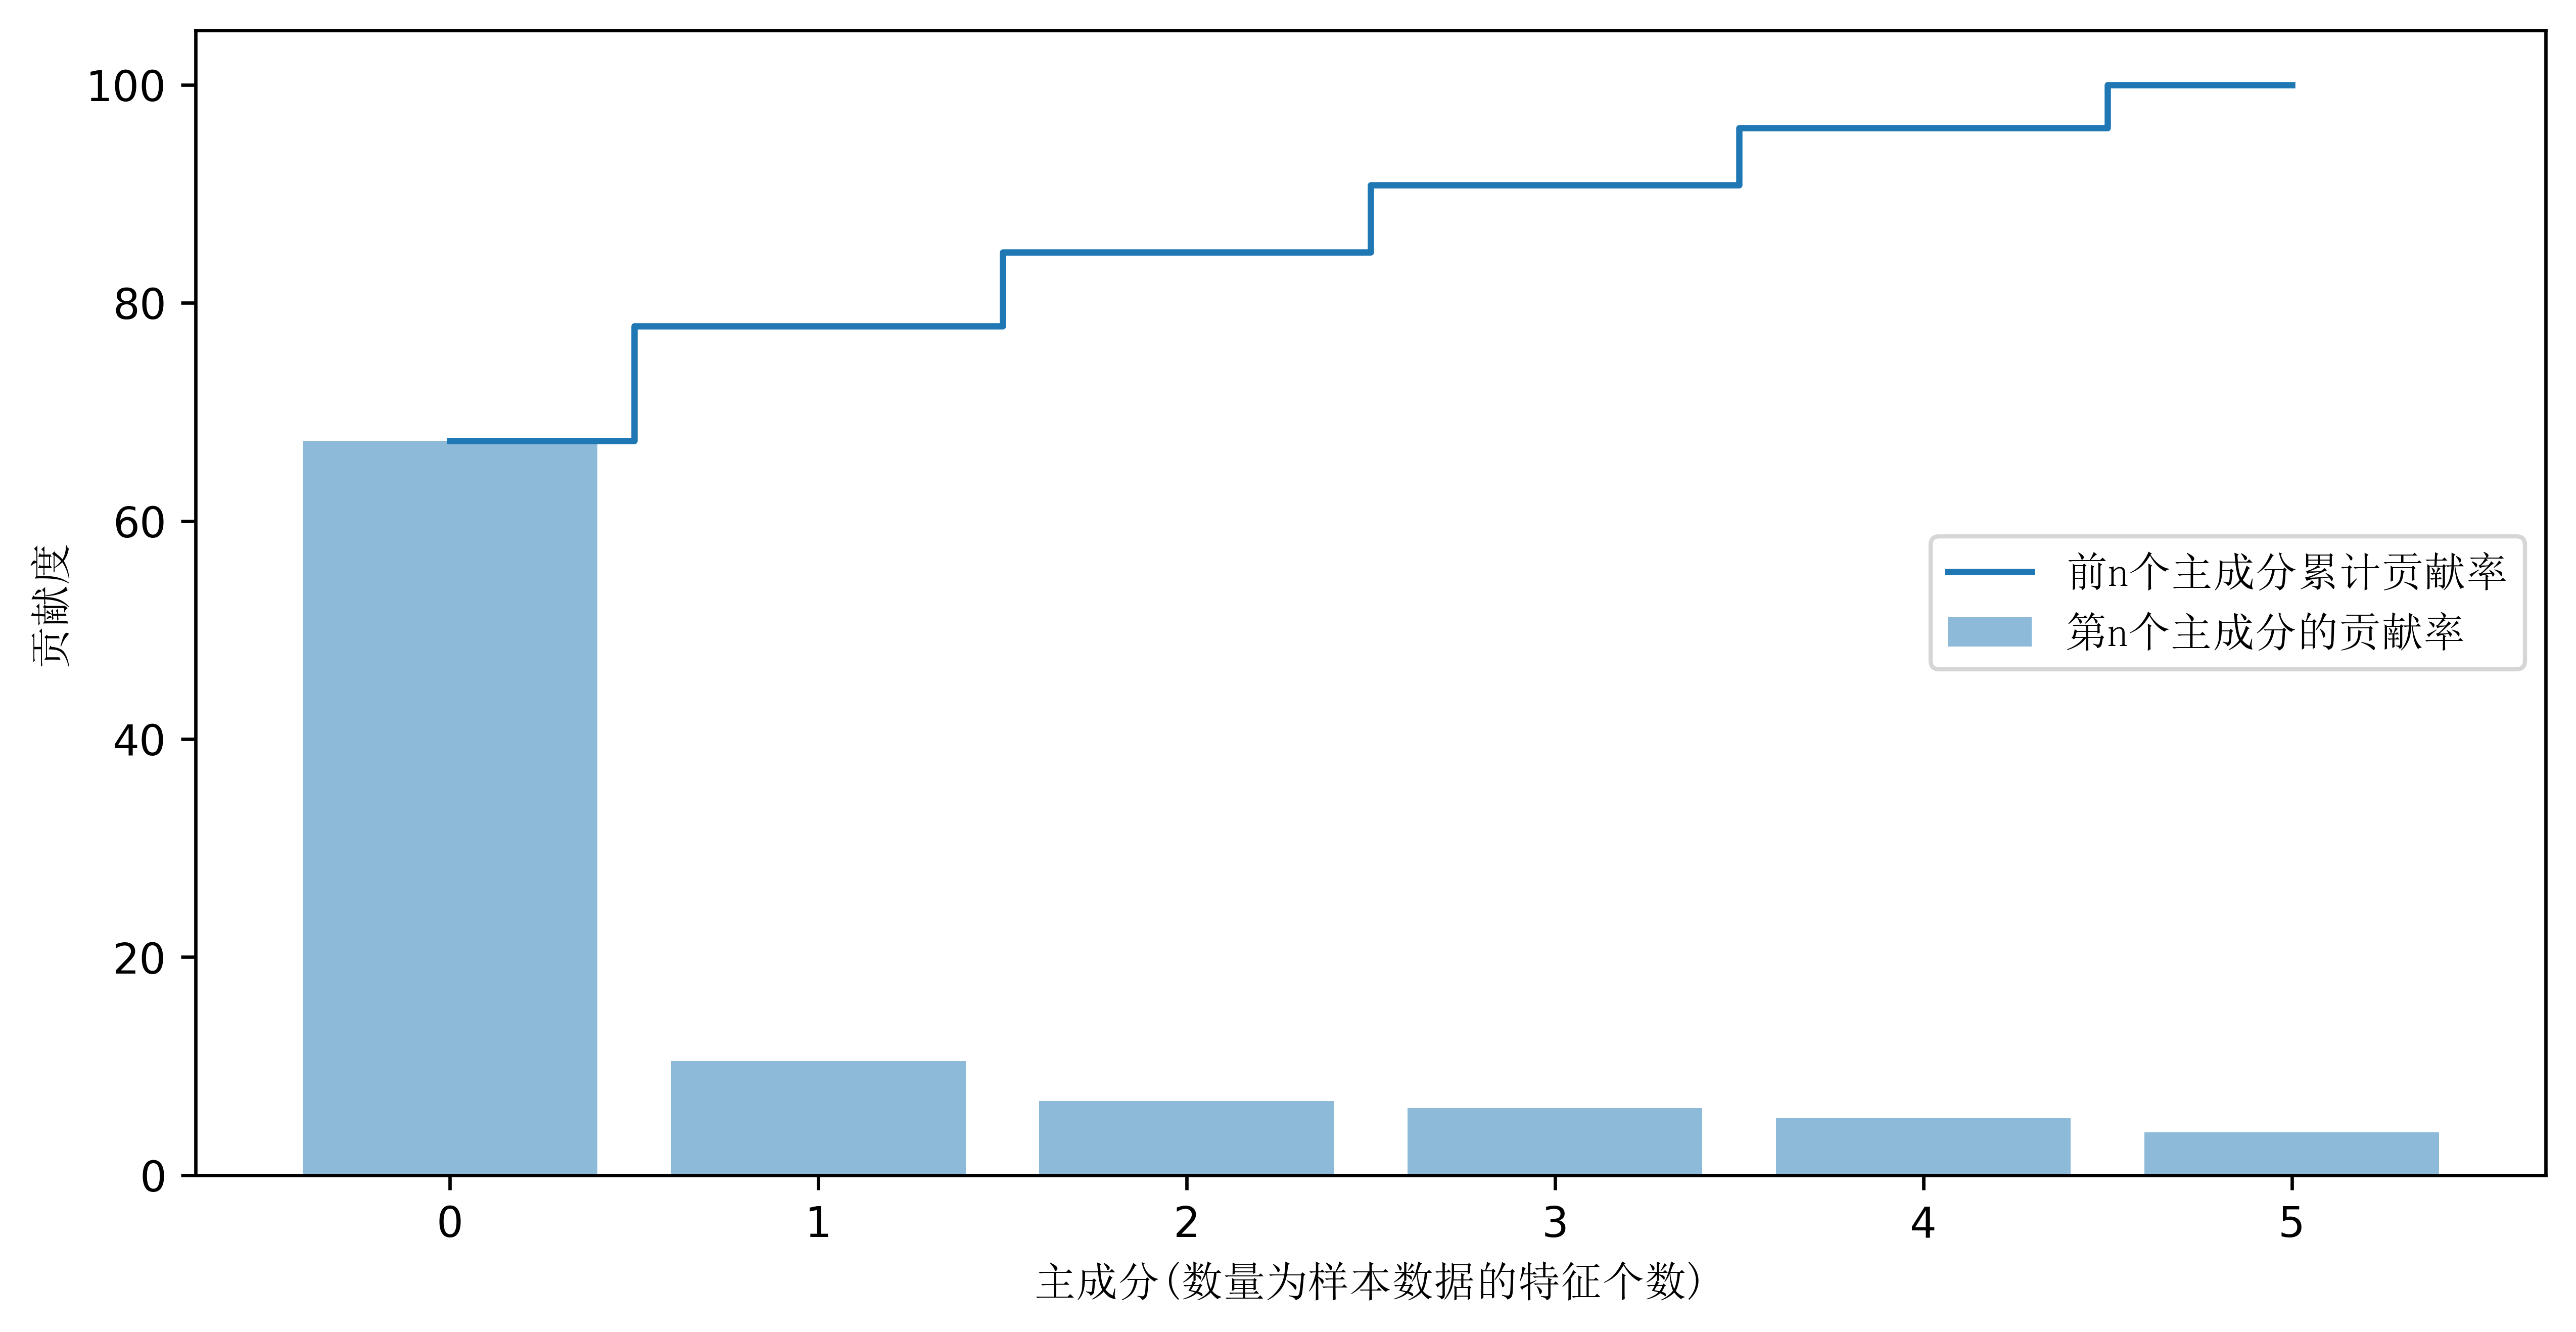

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5), dpi = 600)
plt.bar(range(6), var_exp, alpha=0.5, align='center', label='第n个主成分的贡献率')
plt.step(range(6), cum_var_exp, where='mid', label='前n个主成分累计贡献率')
plt.ylabel('贡献度', FontProperties = font_set)
plt.xlabel('主成分(数量为样本数据的特征个数)', FontProperties = font_set)
plt.legend(loc = 'right', prop = font_set)
plt.show()

In [12]:
eigVector_TargetD = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))

print('特征向量矩阵W:\n', eigVector_TargetD)

特征向量矩阵W:
 [[ 0.41410999  0.52131991]
 [ 0.40912246  0.33994542]
 [ 0.42028435  0.32411333]
 [-0.39837248  0.48403406]
 [-0.39542242  0.35520391]
 [-0.41162273  0.38360714]]


In [13]:
train_x_std_TargetD = np.mat(train_x_std)*np.mat(eigVector_TargetD)
test_x=pd.DataFrame(train_x_std_TargetD)
test_x

,0,1
0,1.861134,-0.772433
1,-0.660551,0.335921
2,-1.738789,-0.153232
3,-0.831175,0.497056
4,0.200541,0.709454
...,...,...
95,-3.221303,-0.766324
96,0.081659,0.776292
97,-0.056945,0.316059
98,2.719594,-0.350890


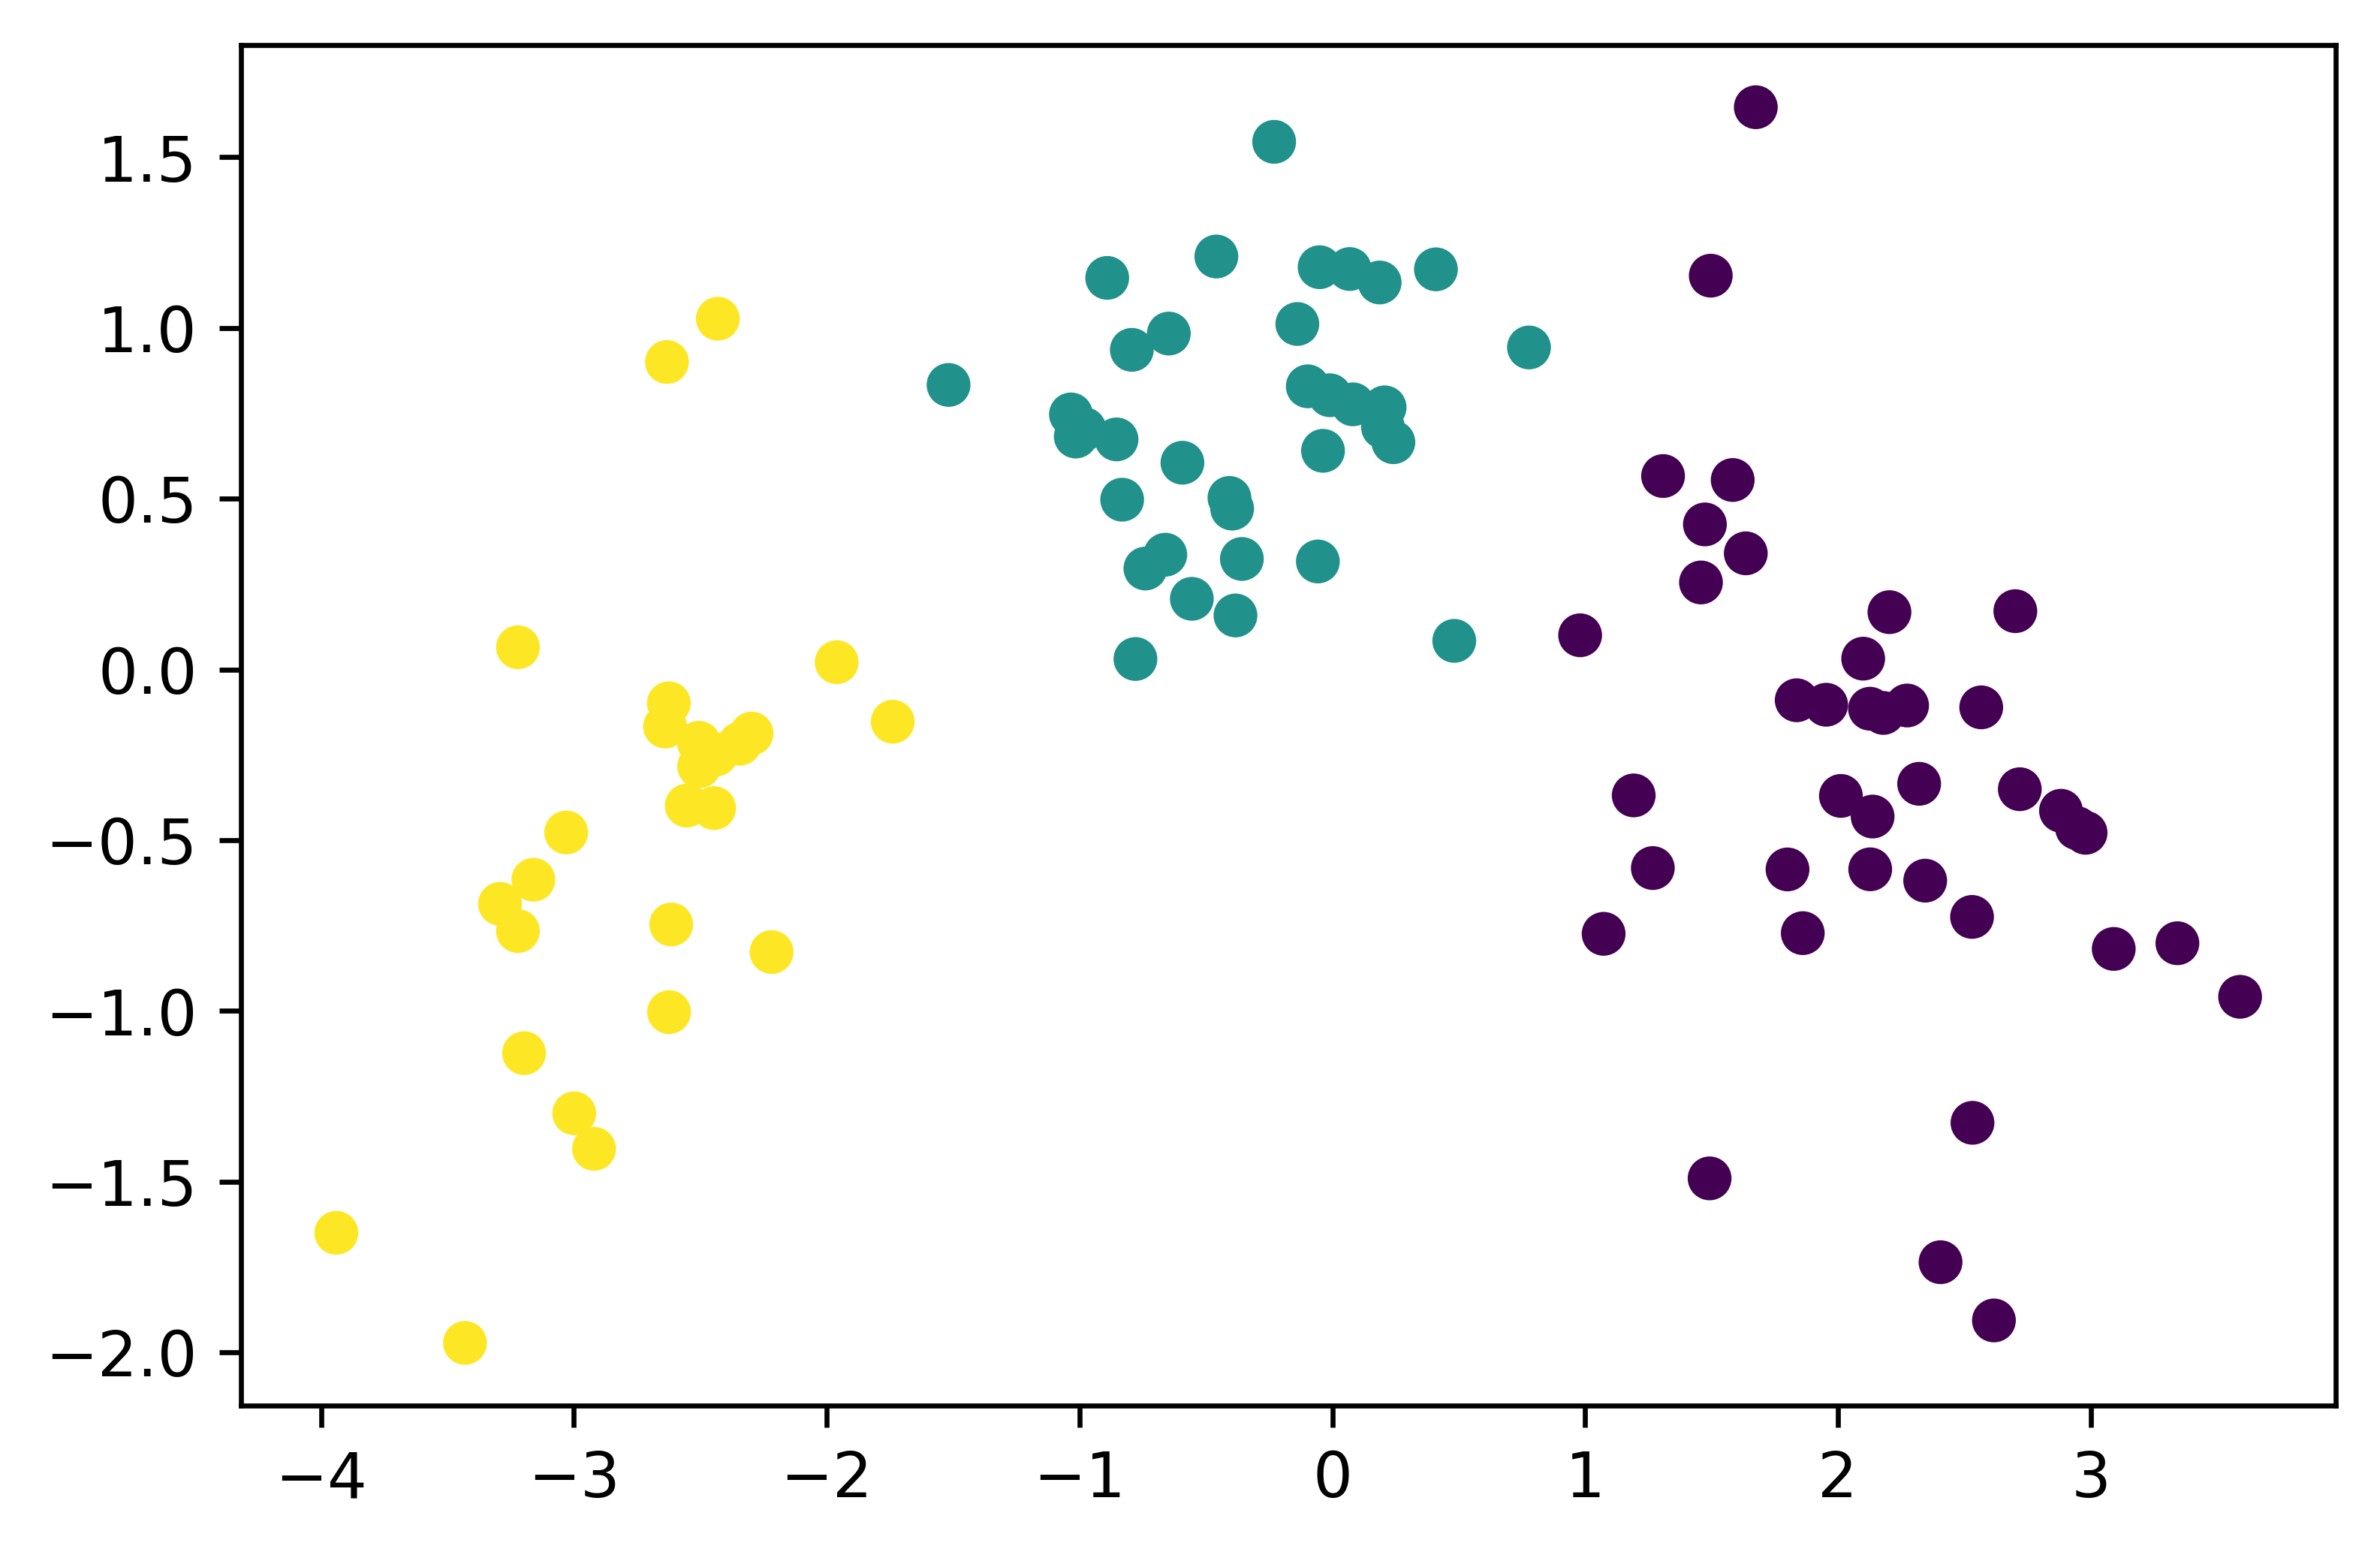

In [14]:
test_y=pd.DataFrame(train_y)
plt.figure(dpi = 600)
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=test_y.iloc[:,0])
plt.show()

In [15]:
import math
TargetD=2
p=train_x.shape[1]
A = np.zeros((p,TargetD))
for n in range(0,TargetD):
    A[:,n] = math.sqrt(eig_pairs[n][0]) * eig_pairs[n][1]
A = pd.DataFrame(A)
A

,0,1
0,0.836751,0.415589
1,0.826673,0.271000
2,0.849227,0.258378
3,-0.804952,0.385865
4,-0.798991,0.283163
5,-0.831725,0.305806


In [16]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q =20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda)))))) #奇异值分解svd
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

A2 = varimax(A)
A2 = pd.DataFrame(A2)
A2

,0,1
0,-0.508798,0.783576
1,-0.573705,0.653982
2,-0.599542,0.654595
3,0.889289,-0.077484
4,0.831892,-0.162858
5,0.871594,-0.160026


In [17]:
factor_score_std=np.mat(train_x_std)*np.mat(A2)
test_x=pd.DataFrame(factor_score_std)
test_x

,0,1
0,-3.550584,1.383728
1,1.285228,-0.448722
2,2.962244,-1.893144
3,1.647379,-0.513598
4,-0.060996,0.693067
...,...,...
95,5.292168,-3.838333
96,0.172900,0.616688
97,0.227271,0.158335
98,-4.872752,2.555757


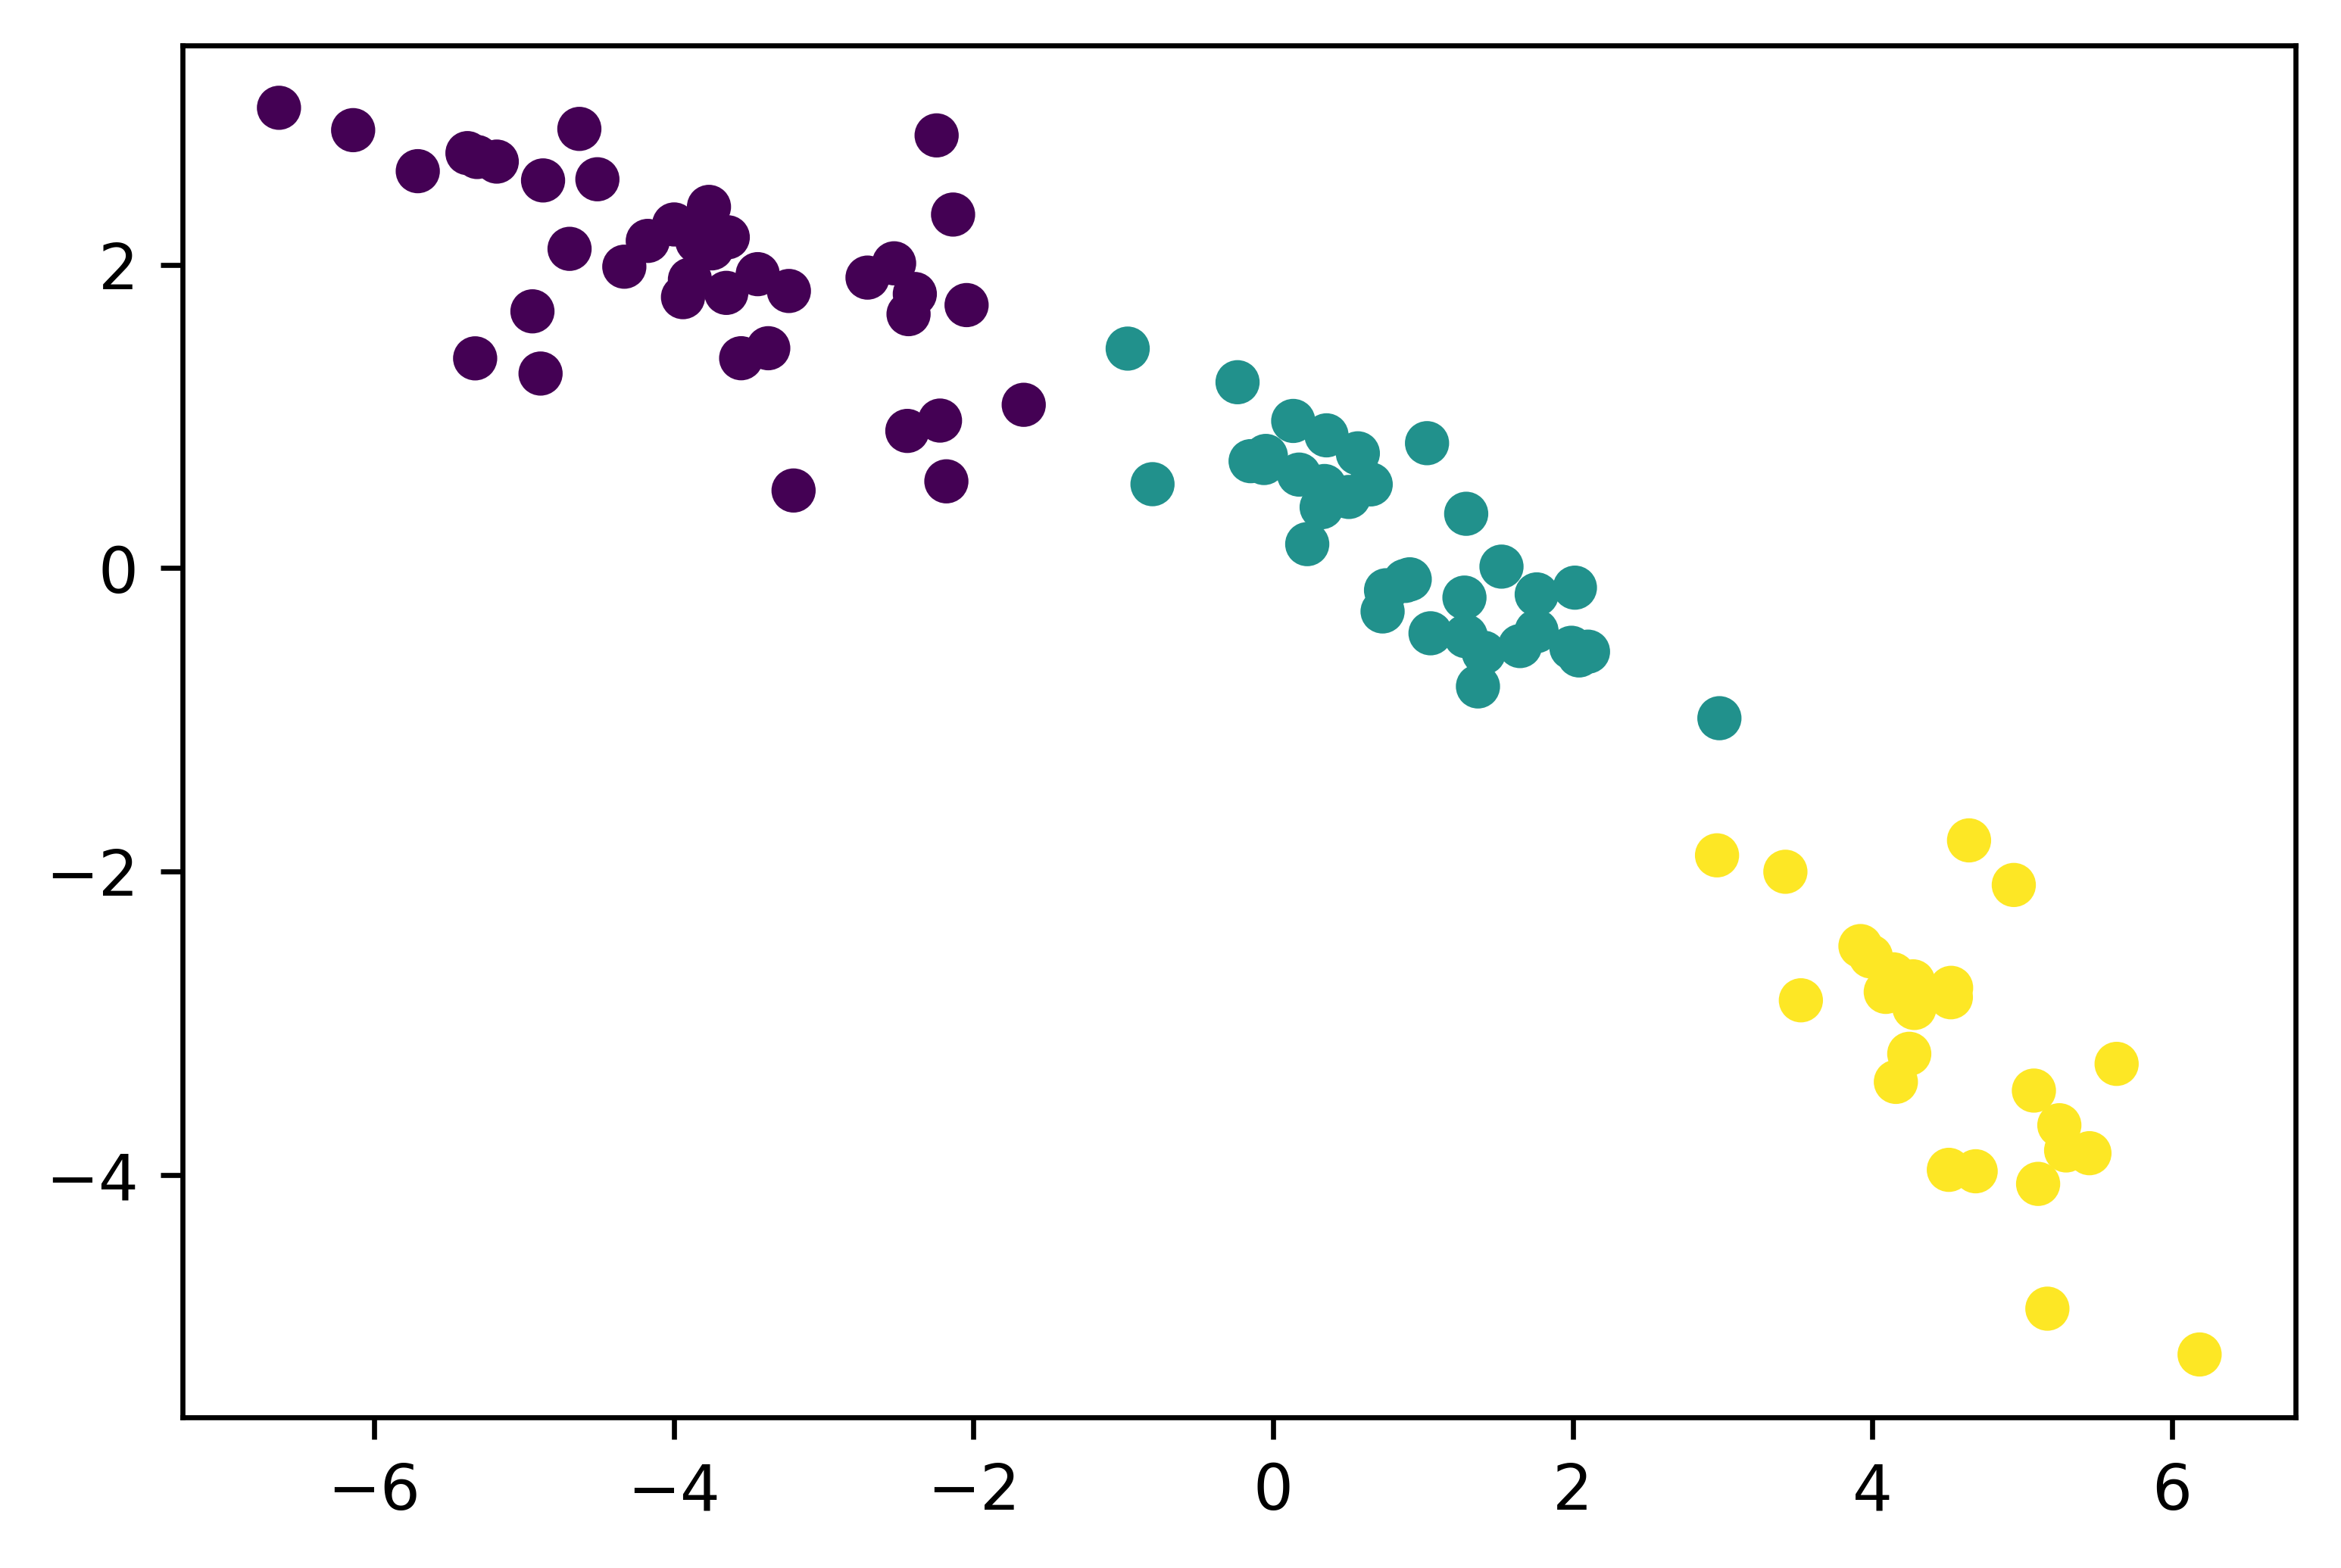

In [18]:
test_y=pd.DataFrame(train_y)
plt.figure(dpi = 600)
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=test_y.iloc[:,0])
plt.show()

In [19]:
h=np.zeros(p)
D=np.mat(np.eye(p))
b=np.mat(np.zeros((TargetD,p)))
for i in range(p):
    b=dot(A2.iloc[i],(A2.iloc[i].T))
    h[i]=b
    D[i,i] = 1-b
print("特殊因子方差：")
print(pd.DataFrame(D))
print("共同度(每个因子对公共因子的依赖程度)：")
print(h)

特殊因子方差：
          0         1         2         3         4         5
0  0.127134  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.000000  0.243171  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.212055  0.000000  0.000000  0.000000
3  0.000000  0.000000  0.000000  0.203161  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.000000  0.281432  0.000000
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.214716
共同度(每个因子对公共因子的依赖程度)：
[0.87286574 0.75682894 0.78794534 0.79683868 0.71856755 0.78528381]


In [20]:
contribute1=np.zeros(TargetD)
for i in range(TargetD):
    c=dot(A2[i].T ,A2[i])
    contribute1[i]=c
print("经过方差极大化矩阵贡献度（每个公共因子对所有因子的影响）：")
print(contribute1)
contribute2=np.zeros(TargetD)
for i in range(TargetD):
    c=dot(A[i].T ,A[i])
    contribute2[i]=c
print("未经过方差极大化矩阵贡献度（每个公共因子对所有因子的影响）：")
print(contribute2)

经过方差极大化矩阵贡献度（每个公共因子对所有因子的影响）：
[3.19001806 1.528312  ]
未经过方差极大化矩阵贡献度（每个公共因子对所有因子的影响）：
[4.08282553 0.63550453]


In [21]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components = 6)
model_pca.fit(train_x_std)
model_pca.explained_variance_ratio_

array([0.67366621, 0.10485825, 0.06808995, 0.06148461, 0.05245443,
       0.03944655])

In [22]:
model_pca = PCA(n_components='mle')
model_pca.fit(train_x_std)
model_pca.explained_variance_ratio_,model_pca.n_components_

(array([0.67366621, 0.10485825]), 2)

In [23]:
model_pca = PCA(n_components=0.9)
model_pca.fit(train_x_std)
model_pca.explained_variance_ratio_,model_pca.n_components_

(array([0.67366621, 0.10485825, 0.06808995, 0.06148461]), 4)

In [24]:
model_pca = PCA(n_components=2)
train_x_std_TargetD_sklearn = model_pca.fit_transform(train_x_std)
train_x_std_TargetD_sklearn[:10]

array([[-1.86113421,  0.77243339],
       [ 0.66055137, -0.33592073],
       [ 1.73878871,  0.15323154],
       [ 0.83117531, -0.49705583],
       [-0.20054094, -0.70945408],
       [ 0.73931044, -0.29535516],
       [-1.67534278, -1.64649533],
       [ 3.93953795,  1.65012356],
       [ 2.63174808, -0.90026197],
       [ 2.55331817,  0.39888605]])

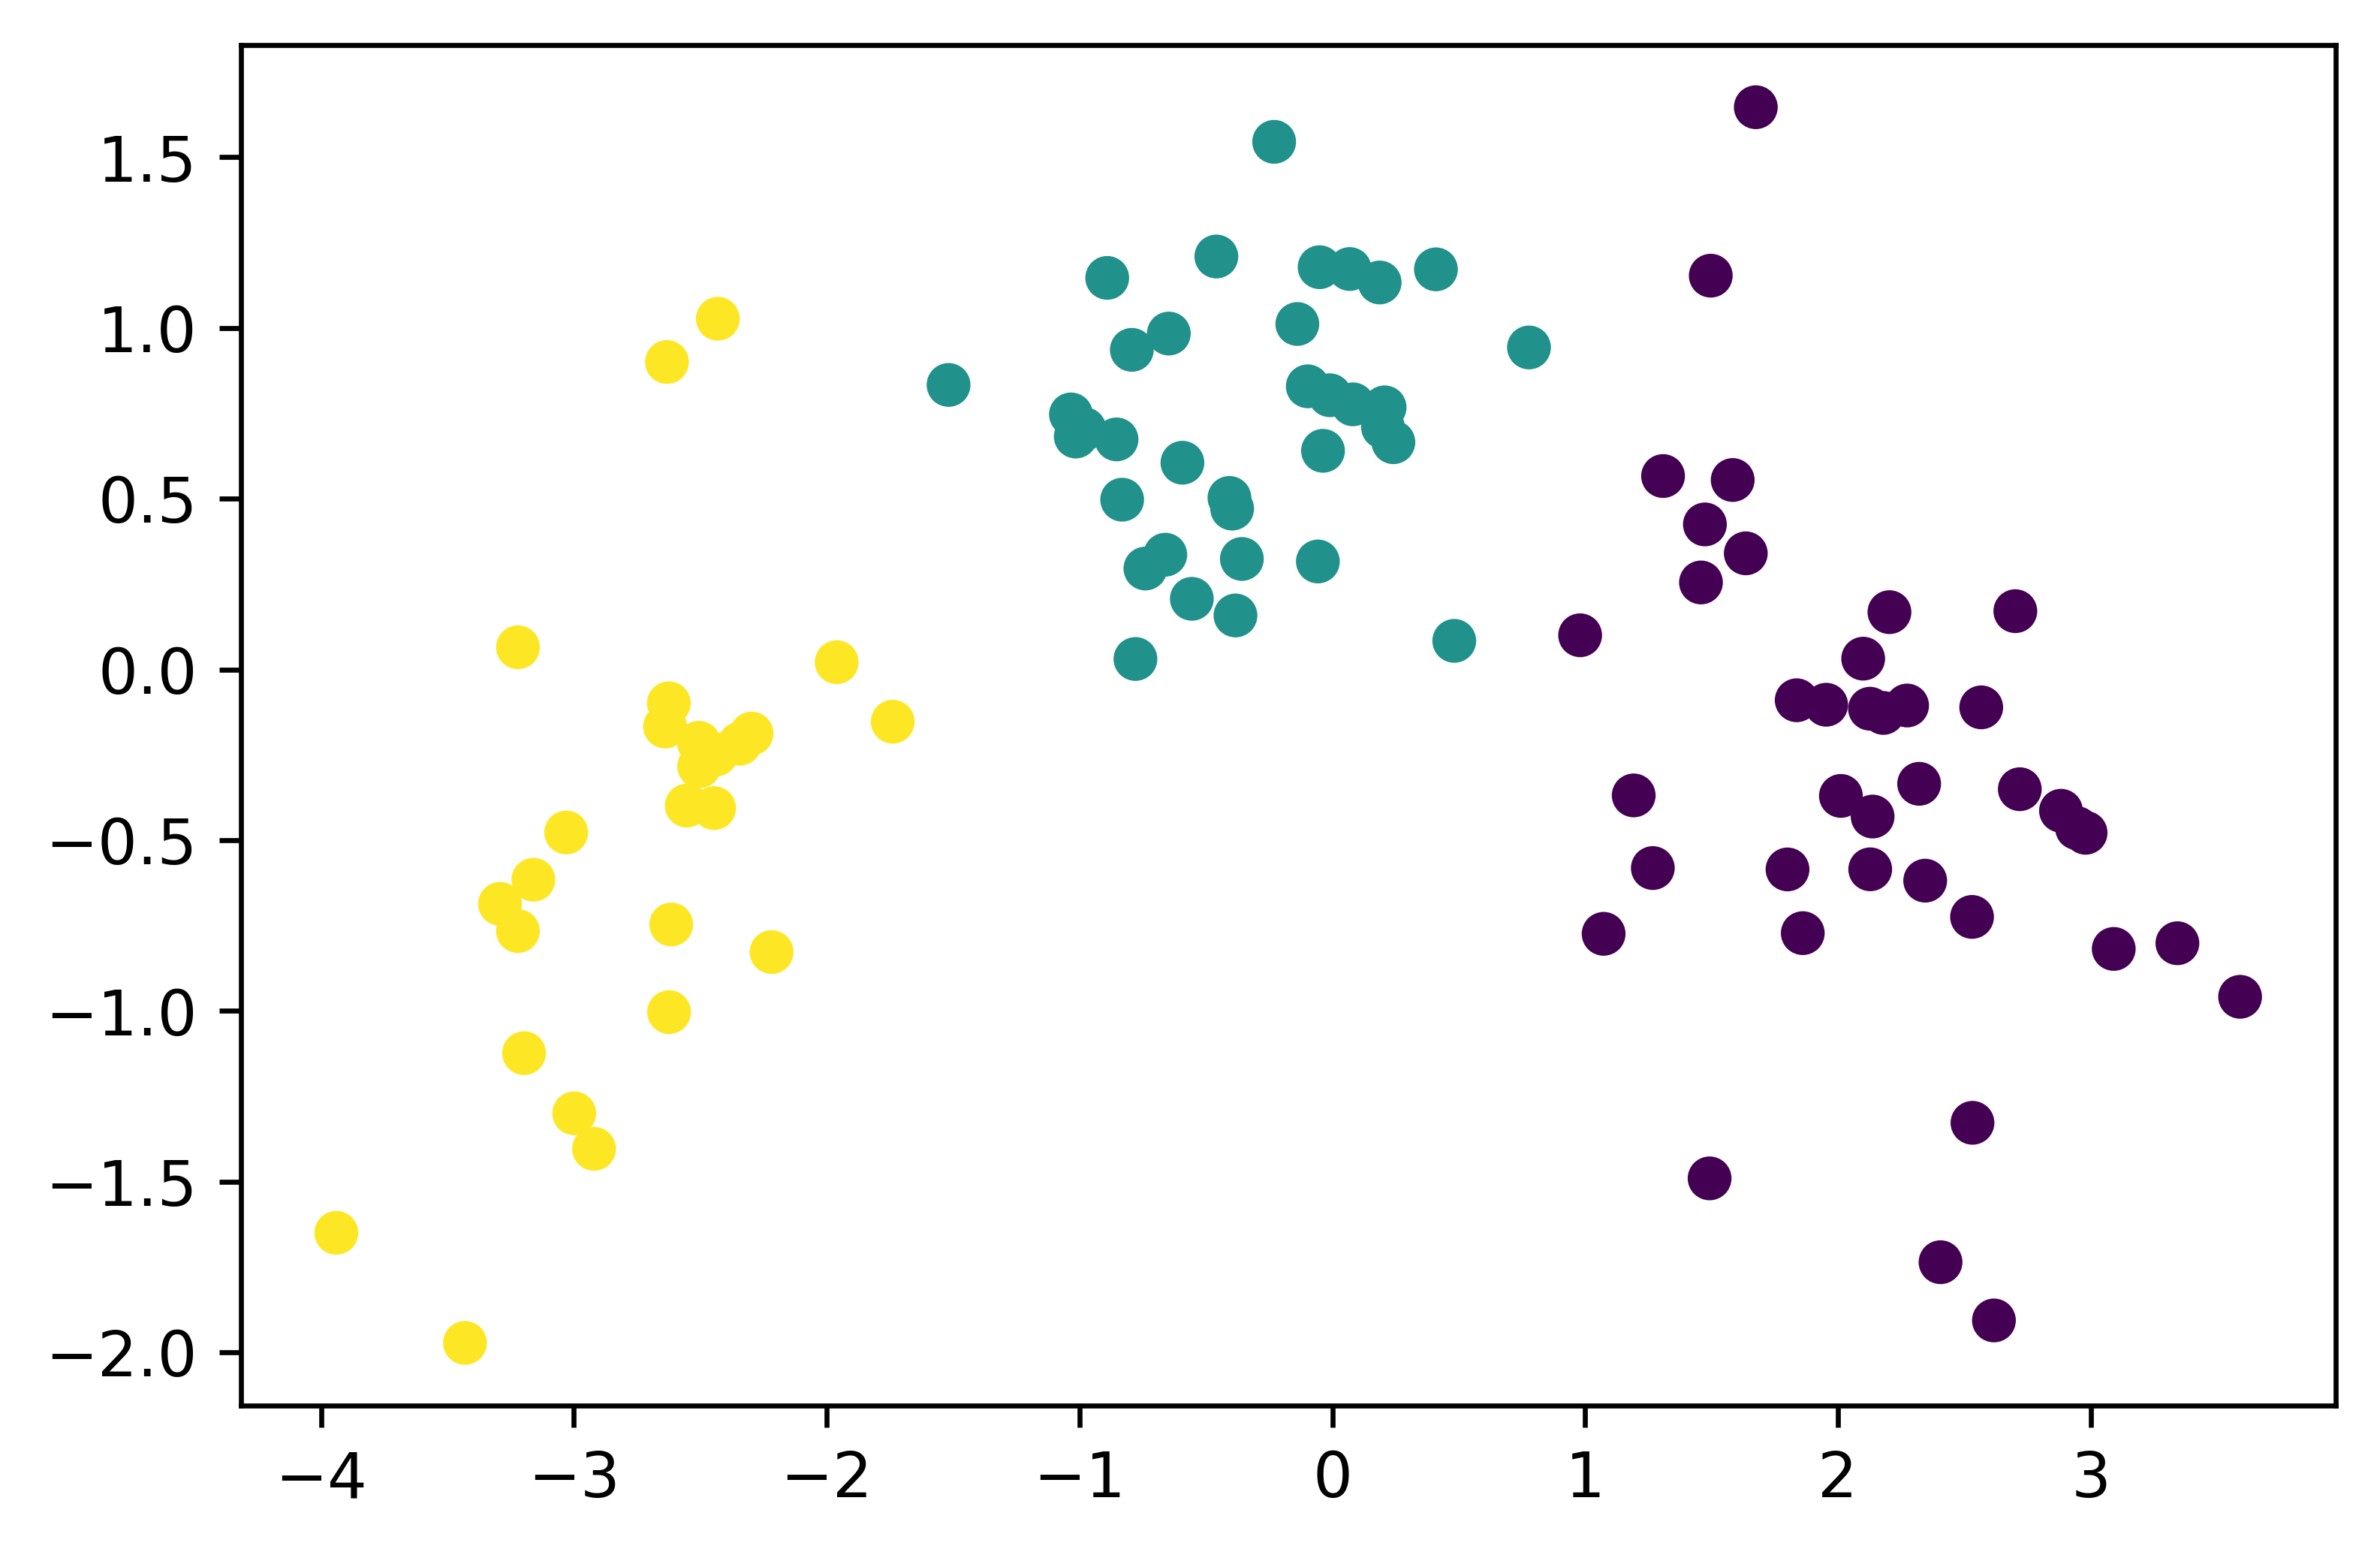

In [25]:
test_x = pd.DataFrame(train_x_std_TargetD_sklearn)
test_y = pd.DataFrame(train_y)
plt.figure(dpi = 600)
plt.scatter(-test_x.iloc[:, 0], -test_x.iloc[:, 1], c = test_y.iloc[:,0])
plt.show()

In [26]:
from factor_analyzer import FactorAnalyzer
model_fa = FactorAnalyzer(n_factors = 2, rotation = None) #rotation = None:不使用方差极大化
model_fa.fit(train_x_std)
model_fa.loadings_ #查看旋转矩阵

array([[ 0.84705541,  0.42022722],
       [ 0.77438549,  0.09988353],
       [ 0.80897684,  0.12675573],
       [-0.76108893,  0.2748373 ],
       [-0.74006985,  0.17376616],
       [-0.79502166,  0.24914017]])

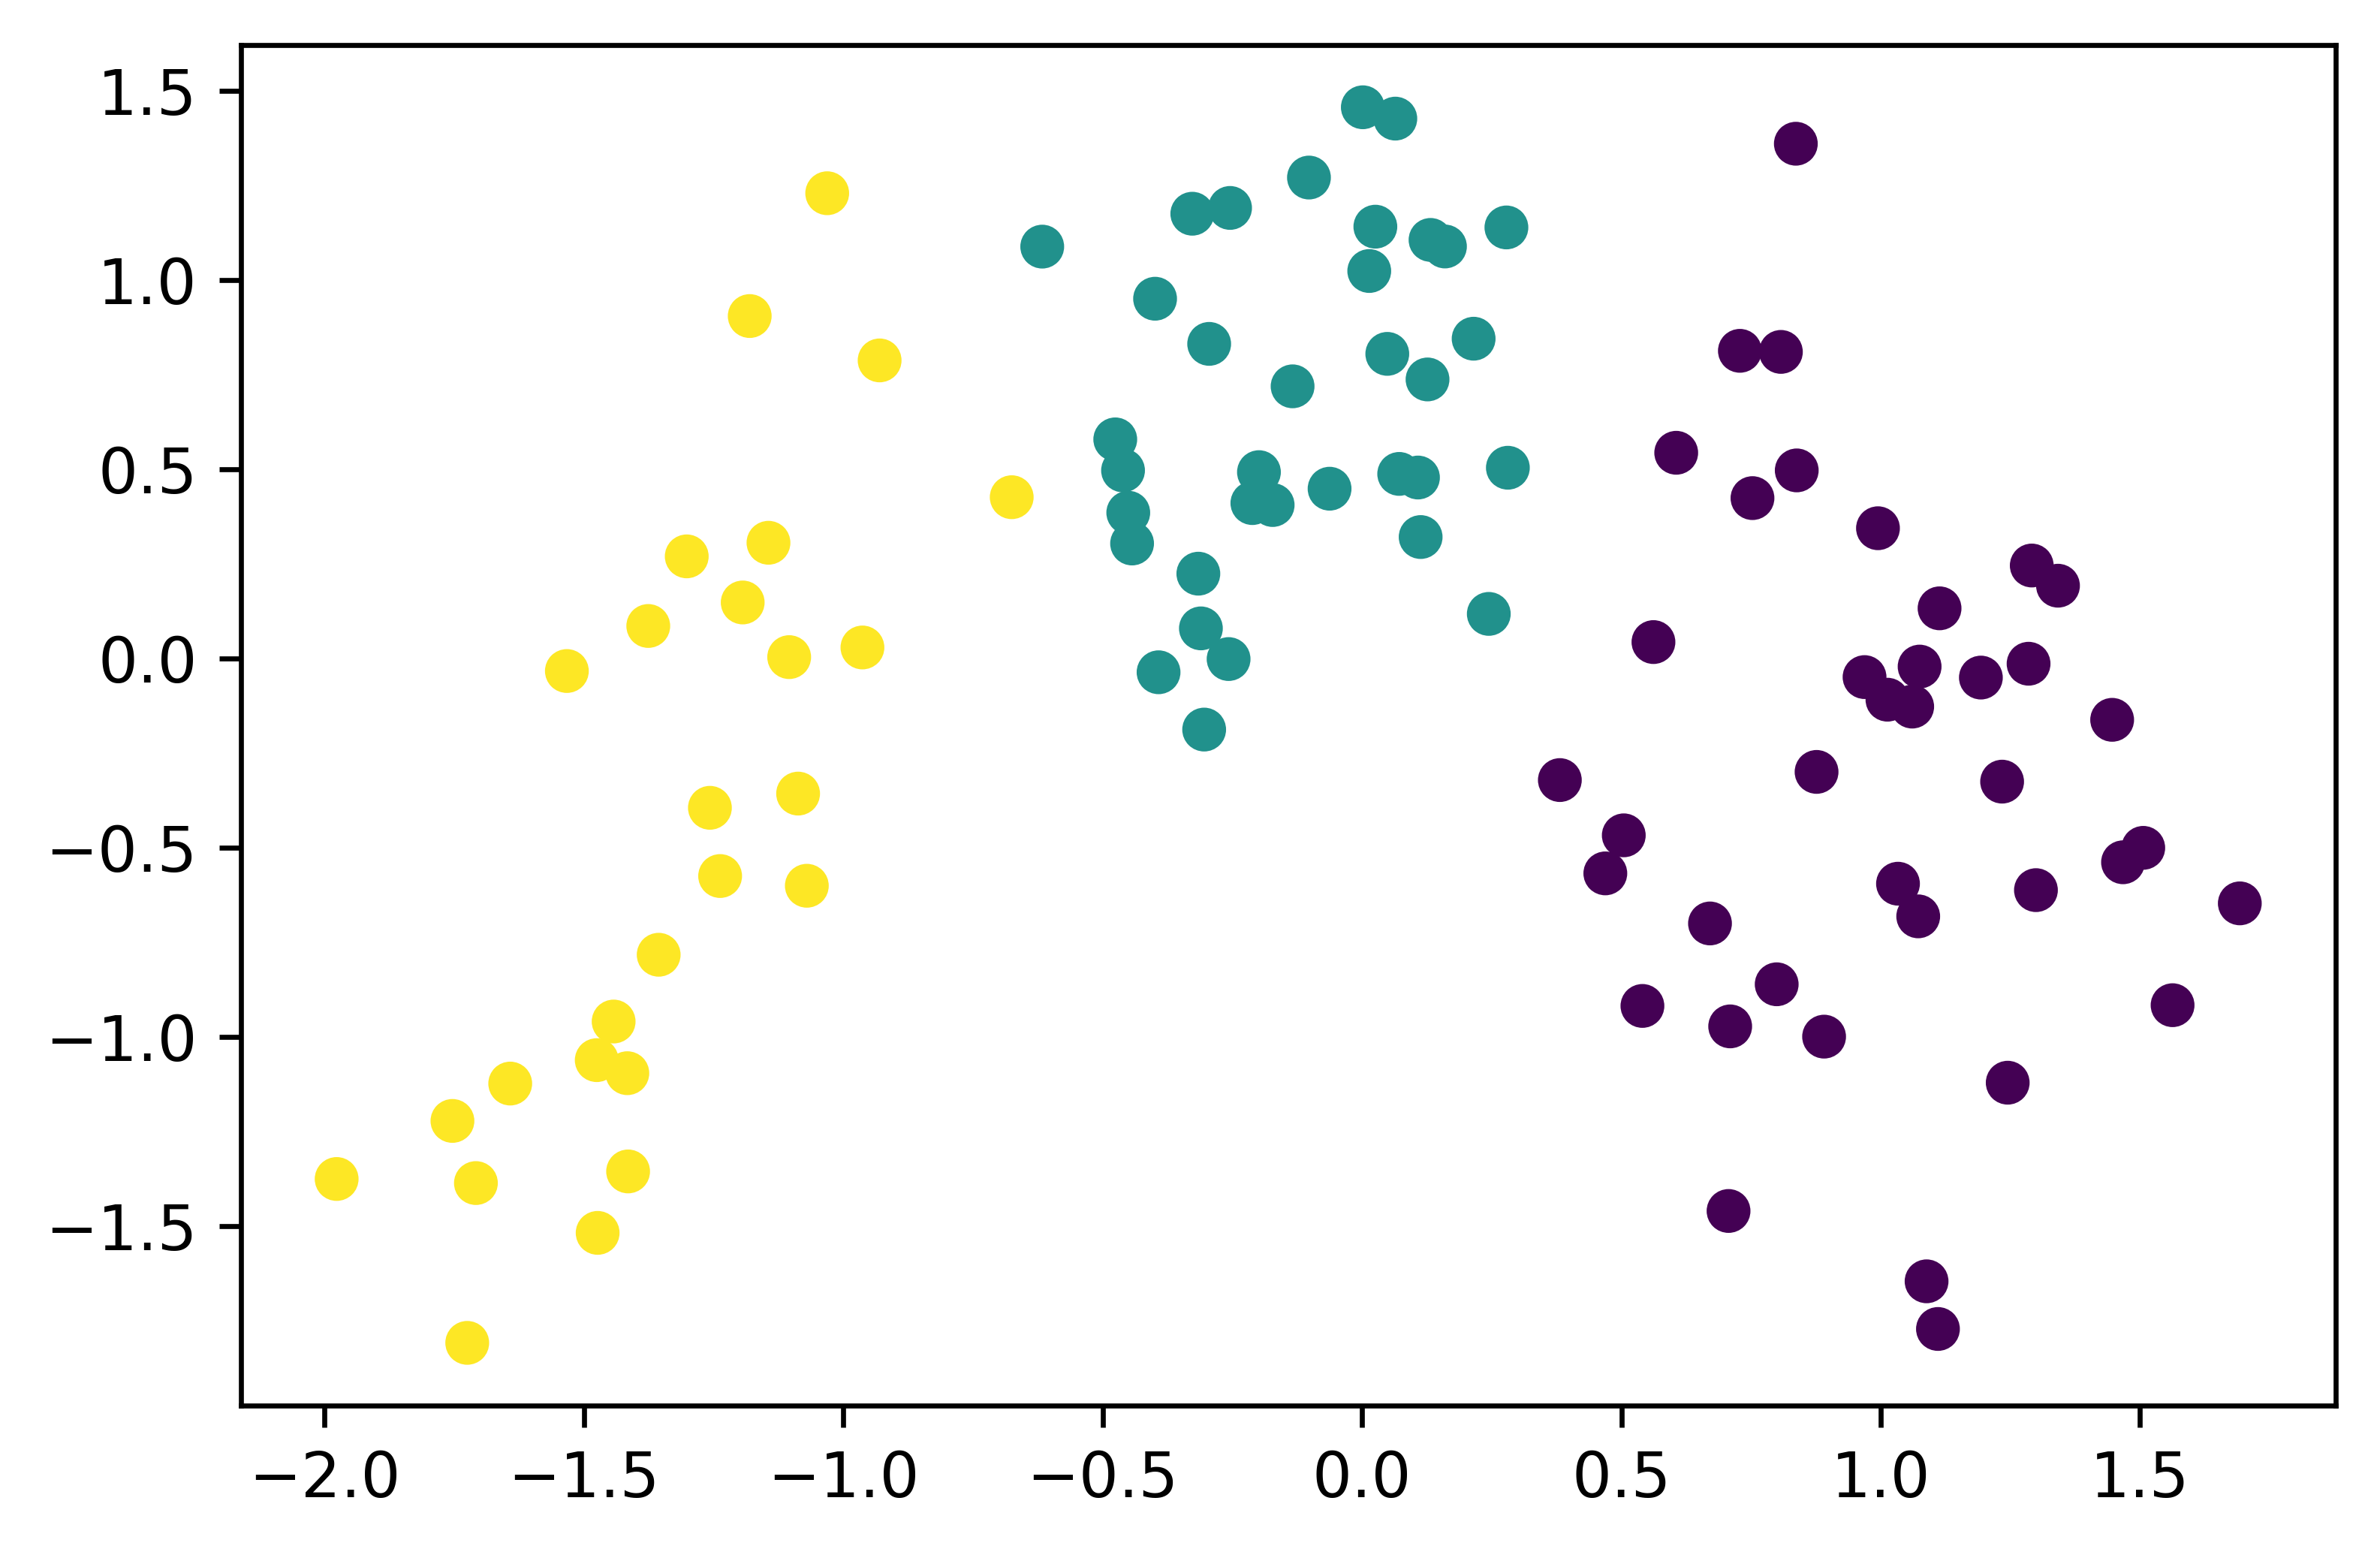

In [27]:
train_x_fa = model_fa.transform(train_x_std)
plt.figure(dpi = 600)
plt.scatter(train_x_fa[:,0],train_x_fa[:,1],c = train_y)
plt.show()

In [28]:
from factor_analyzer import FactorAnalyzer
model_fa = FactorAnalyzer(n_factors = 2, rotation = 'promax')
model_fa.fit(train_x_std)
model_fa.loadings_

array([[ 0.1275346 ,  1.04028284],
       [-0.29824285,  0.52757526],
       [-0.27886405,  0.58452273],
       [ 0.8374085 ,  0.03708563],
       [ 0.67787518, -0.10318093],
       [ 0.81936673, -0.01778936]])

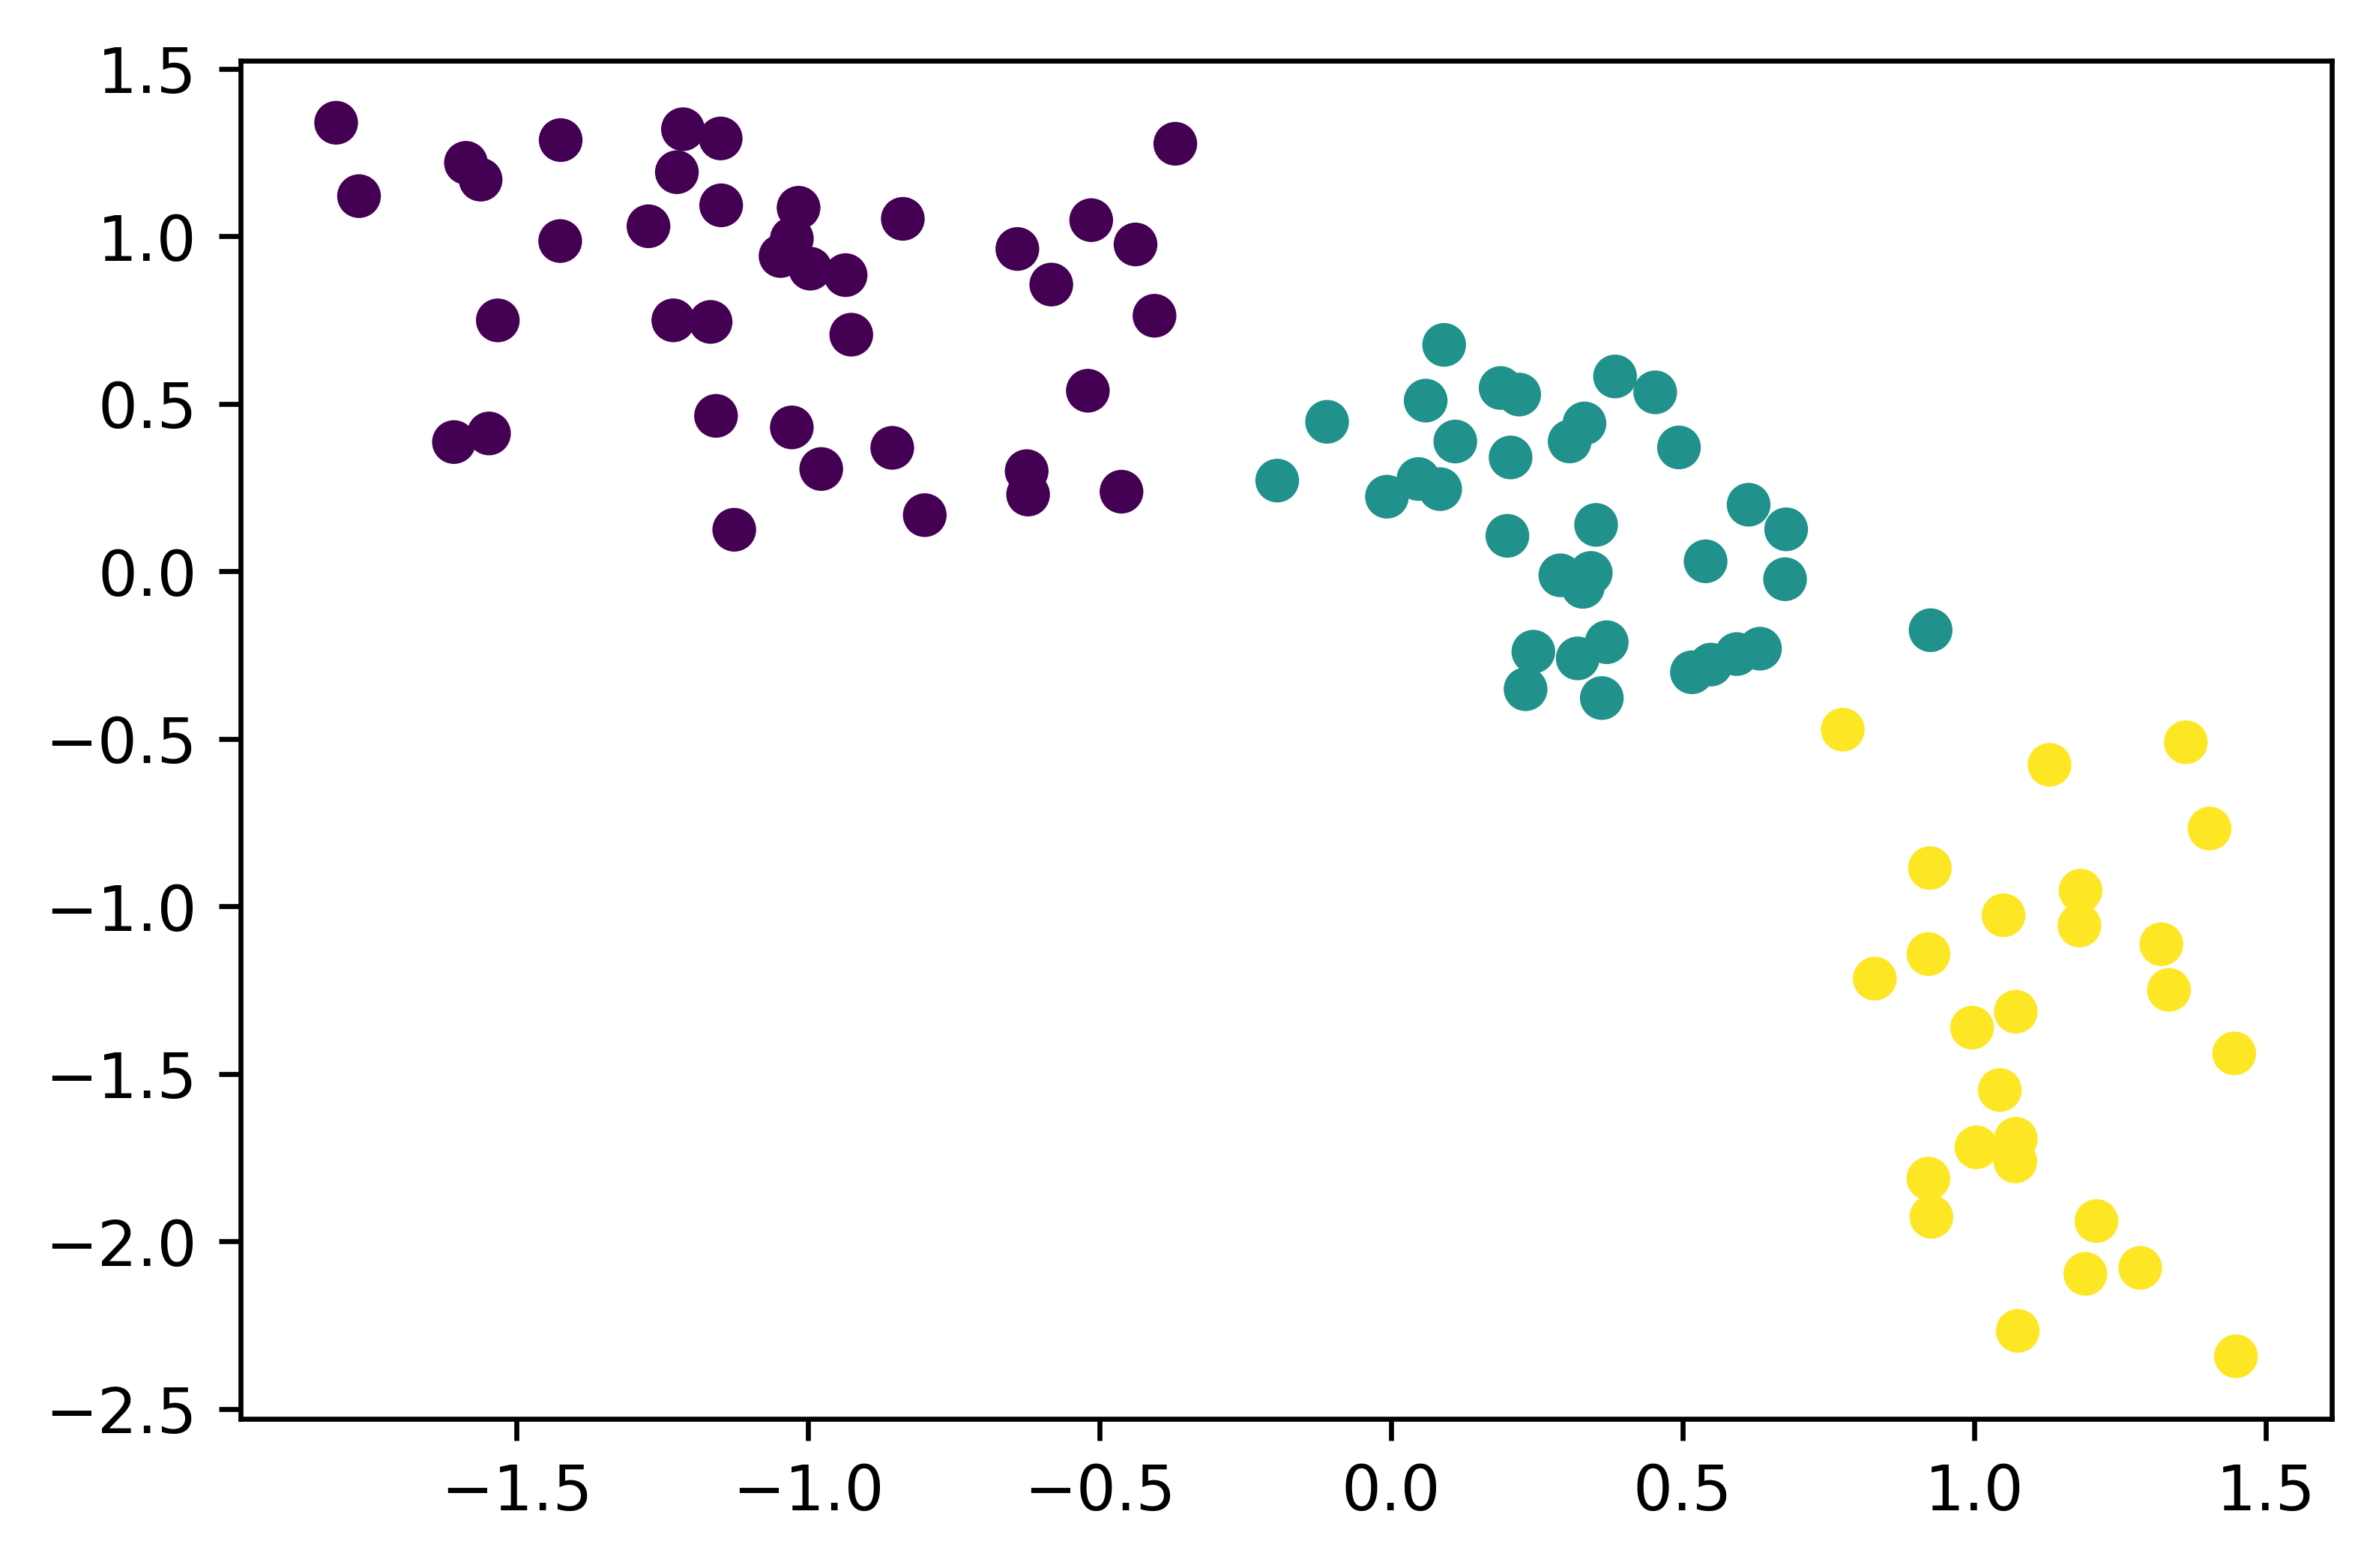

In [29]:
train_x_fa = model_fa.transform(train_x_std)
plt.figure(dpi = 600)
plt.scatter(train_x_fa[:,0],train_x_fa[:,1],c = train_y)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x_std, train_y, random_state=1)

In [57]:
from sklearn import neighbors
model_KNN=neighbors.KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
predict = model_KNN.predict(x_test)
predict

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 2, 3,
       2, 3, 2], dtype=int64)

In [59]:
y_test

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3,
       2, 3, 2], dtype=int64)

In [60]:
model_KNN.score(x_test,y_test)

0.96

In [62]:
x_train, x_test, y_train, y_test = train_test_split(train_x_std_TargetD_sklearn, train_y, random_state=1)

In [63]:
from sklearn import neighbors
model_KNN=neighbors.KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
predict = model_KNN.predict(x_test)
predict

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3,
       2, 3, 2], dtype=int64)

In [65]:
y_test

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3,
       2, 3, 2], dtype=int64)

In [66]:
model_KNN.score(x_test,y_test)

1.0

In [87]:
x_train, x_test, y_train, y_test = train_test_split(train_x_fa, train_y, random_state=1)

In [88]:
from sklearn import neighbors
model_KNN=neighbors.KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
predict = model_KNN.predict(x_test)
predict

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2,
       2, 3, 2], dtype=int64)

In [90]:
y_test

array([1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3,
       2, 3, 2], dtype=int64)

In [91]:
model_KNN.score(x_test,y_test)

0.92